In [9]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
#read in original dataframe
df =  pd.read_csv(r'autos.csv')

#selecting only the columns we care about
df = df[['price','vehicleType','yearOfRegistration','gearbox','powerPS','model',
        'kilometer','fuelType','brand','notRepairedDamage','dateCreated','postalCode']]

In [11]:
#cleaning data, removing incomplete rows
df = df[df['price']>500] #removing rows where price less than $10
df = df[df['price']<50000] #removing price outliers over $100k
df = df[df['powerPS']!=0] #removing rows where horsepower is 0
df = df[df['powerPS'] < 1000] #removing rows with impossible horsepower
df = df.dropna() #removing all NaN values
#236769 rows

In [12]:
#removing unpopular car brands
#print(df['brand'].unique())
lst = ['rover','lancia','saab','daihatsu','daewoo','trabant','lada','opel']
df = df[df.brand.isin(lst) == False]

#should now be at 212477 rows
#df

In [13]:
#removing buses and "andere"(other) from car type
#print(df['vehicleType'].unique())
lst2=['andere','bus']
df = df[df.vehicleType.isin(lst2) == False]

#should now be at 190888 rows
#df

In [14]:
df['age'] = pd.Timestamp.now().year - df['yearOfRegistration']

In [15]:
df.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,dateCreated,postalCode,age
3,1500,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,22
4,3600,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,nein,2016-03-31 00:00:00,60437,15
5,650,limousine,1995,manuell,102,3er,150000,benzin,bmw,ja,2016-04-04 00:00:00,33775,28
6,2200,cabrio,2004,manuell,109,2_reihe,150000,benzin,peugeot,nein,2016-04-01 00:00:00,67112,19
10,2000,limousine,2004,manuell,105,3_reihe,150000,benzin,mazda,nein,2016-03-26 00:00:00,96224,19


CLEAN, READY TO VISUALIZE

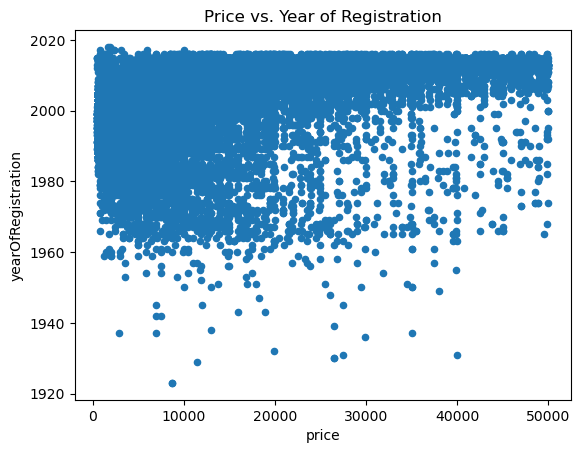

In [16]:
#scatterplot of price vs year of registration
df.plot.scatter(x = "price", y = "yearOfRegistration")
plt.title("Price vs. Year of Registration")
plt.show()



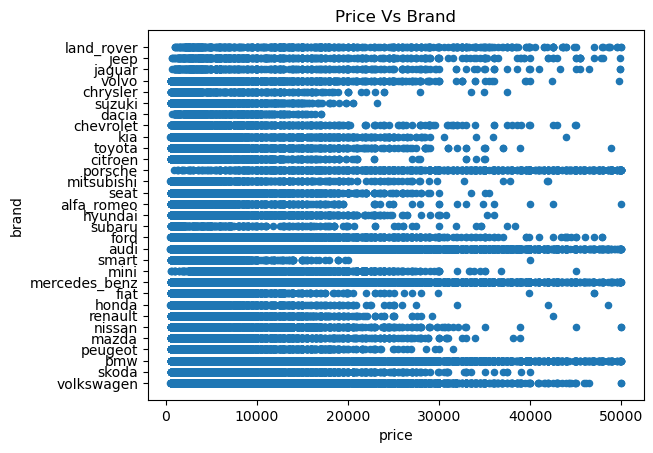

In [17]:
df.plot.scatter(x = "price", y = "brand")
plt.title("Price Vs Brand")
plt.show()

In [18]:
#df2 = df.groupby(['brand'])['brand'].count()
#df2

In [19]:
df3 = df.groupby(['yearOfRegistration'])['yearOfRegistration'].count()
df3

yearOfRegistration
1923       2
1929       1
1930       2
1931       2
1932       1
        ... 
2014    3524
2015    1895
2016     201
2017       6
2018       2
Name: yearOfRegistration, Length: 84, dtype: int64

In [20]:
df4 = df[df['yearOfRegistration']==1929]
df4

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,dateCreated,postalCode,age
241329,11500,cabrio,1929,manuell,15,andere,5000,benzin,bmw,ja,2016-03-09 00:00:00,70569,94


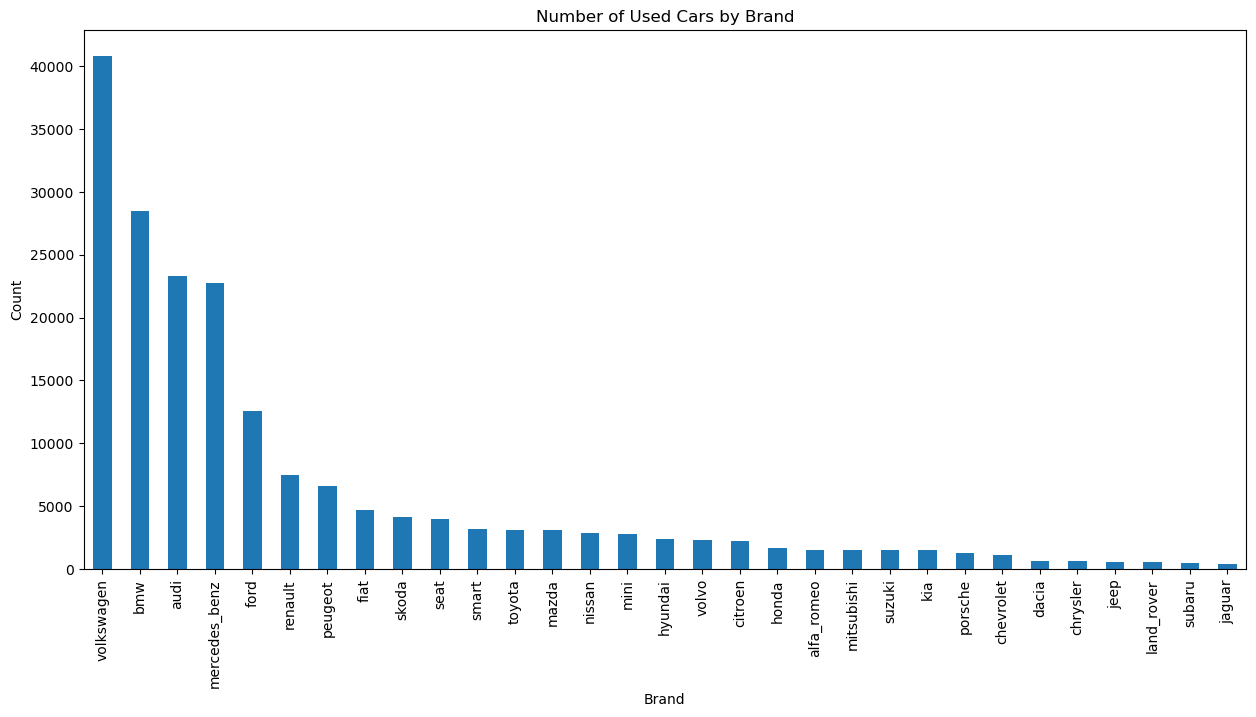

In [21]:
plt.figure()
df['brand'].value_counts().plot(kind='bar', figsize=(15, 7))
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Number of Used Cars by Brand')
plt.show()

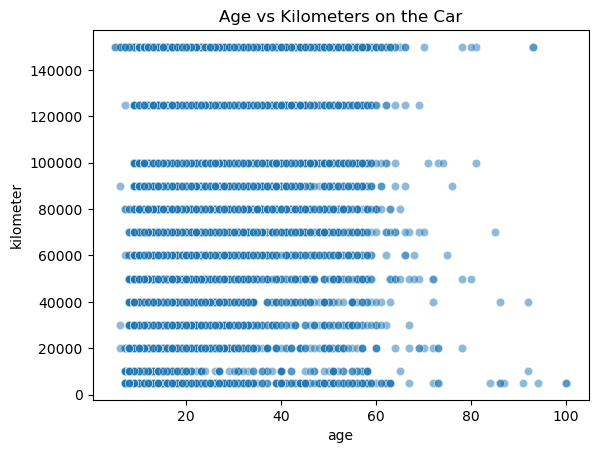

In [22]:
plt.figure()
sns.scatterplot(data=df, x='age', y='kilometer', alpha=0.5)
plt.title('Age vs Kilometers on the Car')
plt.show()

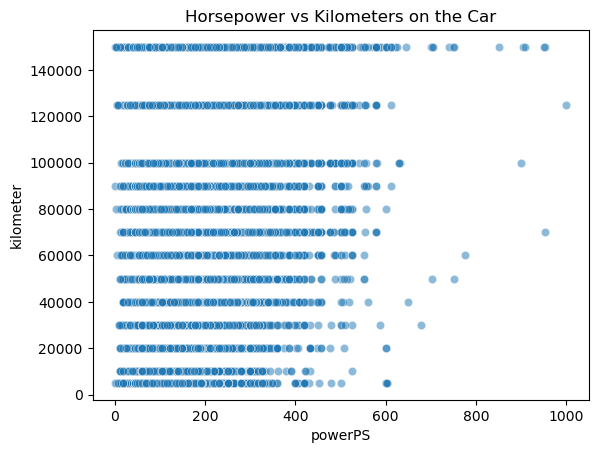

In [23]:
plt.figure()
sns.scatterplot(data=df, x='powerPS', y='kilometer', alpha=0.5)
plt.title('Horsepower vs Kilometers on the Car')
plt.show()

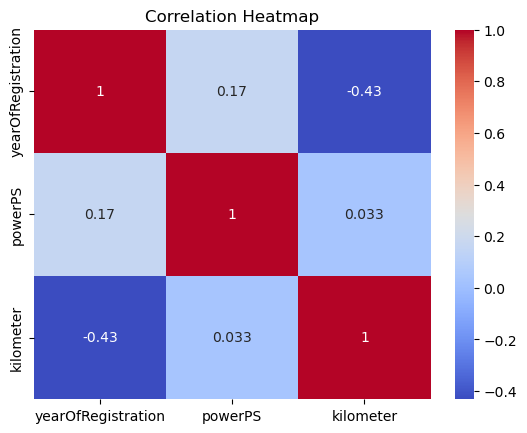

In [24]:
plt.figure()
corr_matrix = df[['yearOfRegistration', 'powerPS', 'kilometer']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

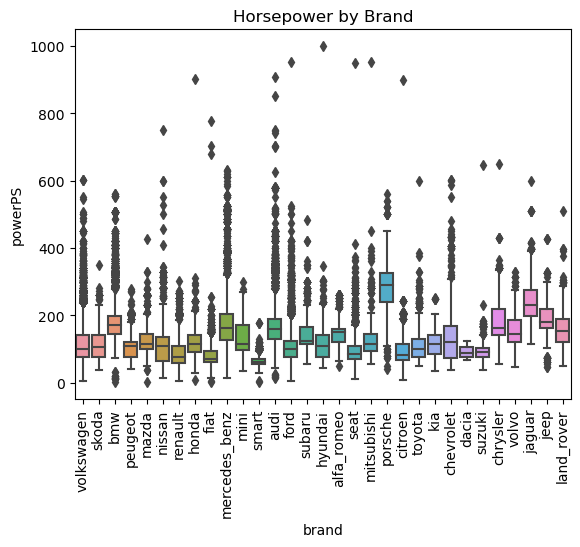

In [25]:
plt.figure()
sns.boxplot(data=df, x='brand', y='powerPS')
plt.xticks(rotation=90)
plt.title('Horsepower by Brand')
plt.show()

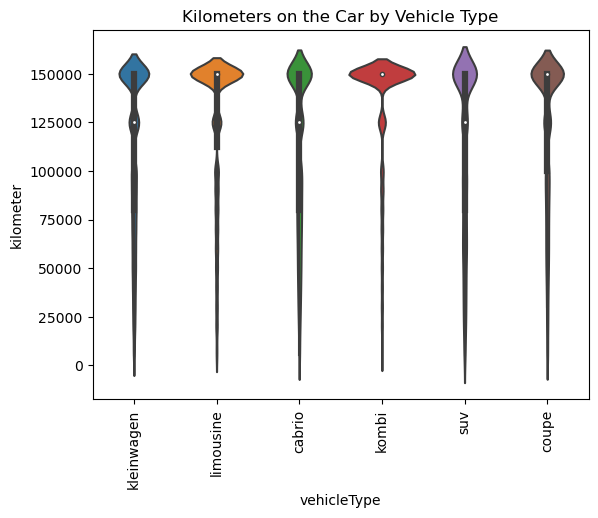

In [26]:
plt.figure()
sns.violinplot(data=df, x='vehicleType', y='kilometer')
plt.xticks(rotation=90)
plt.title('Kilometers on the Car by Vehicle Type')
plt.show()

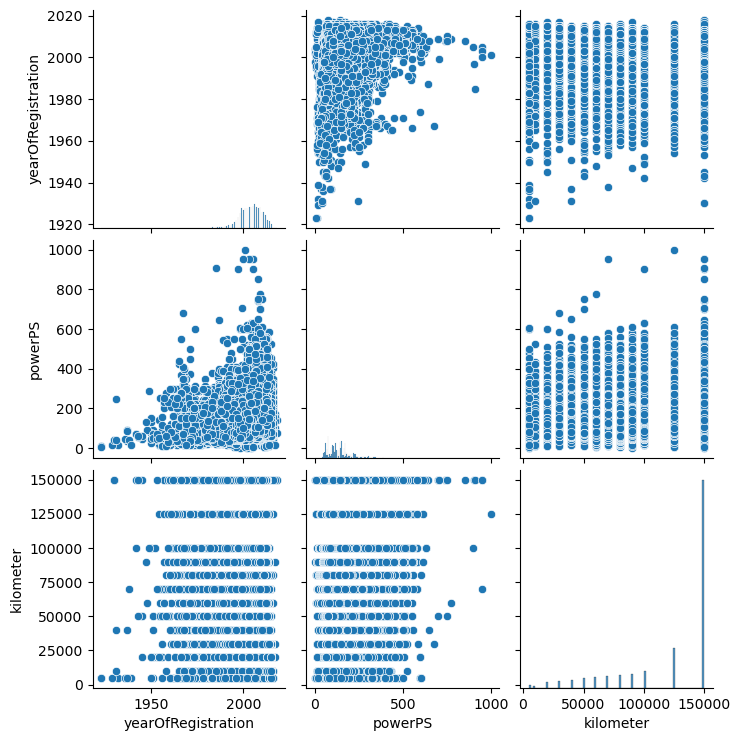

In [27]:
sns.pairplot(df[['yearOfRegistration', 'powerPS', 'kilometer']])
plt.show()

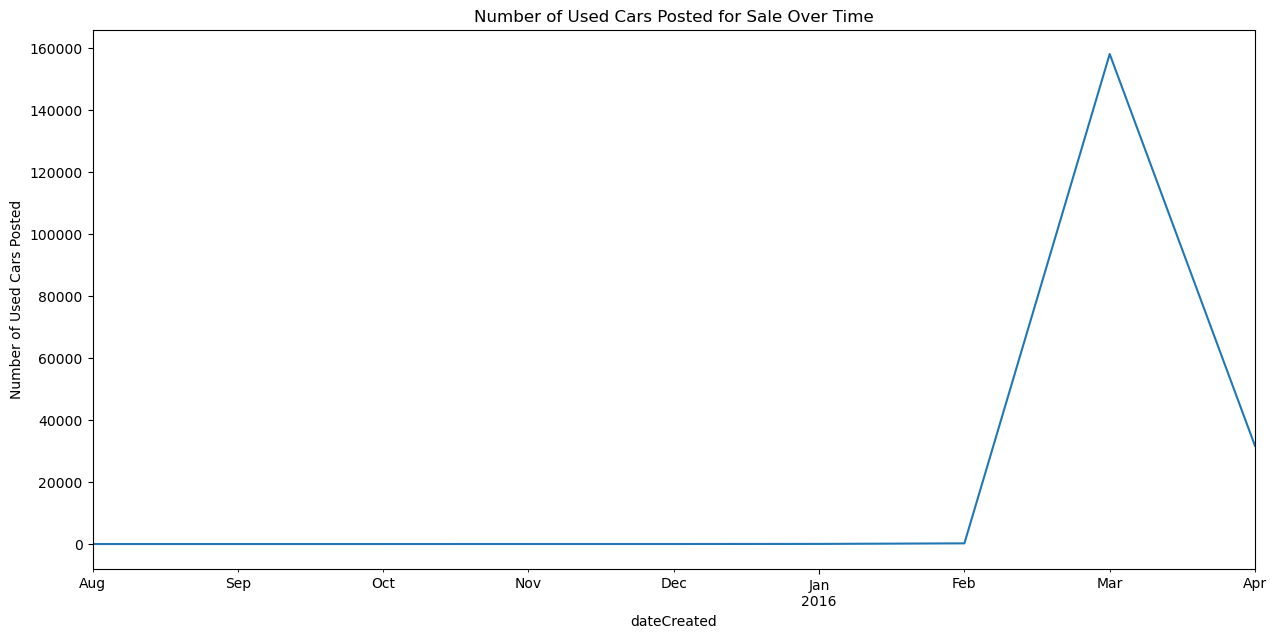

In [28]:
df['dateCreated'] = pd.to_datetime(df['dateCreated'])
df.set_index('dateCreated', inplace=True)
df.resample('M').size().plot(figsize=(15, 7))
plt.ylabel('Number of Used Cars Posted')
plt.title('Number of Used Cars Posted for Sale Over Time')
plt.show()

In [29]:
df.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,postalCode,age
dateCreated,,,,,,,,,,,,
2016-03-17,1500,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,nein,91074,22
2016-03-31,3600,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,nein,60437,15
2016-04-04,650,limousine,1995,manuell,102,3er,150000,benzin,bmw,ja,33775,28
2016-04-01,2200,cabrio,2004,manuell,109,2_reihe,150000,benzin,peugeot,nein,67112,19
2016-03-26,2000,limousine,2004,manuell,105,3_reihe,150000,benzin,mazda,nein,96224,19


In [30]:
df.columns

Index(['price', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS',
       'model', 'kilometer', 'fuelType', 'brand', 'notRepairedDamage',
       'postalCode', 'age'],
      dtype='object')

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [32]:
X, y = df[['vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS',
       'model', 'kilometer', 'fuelType', 'brand', 'notRepairedDamage',
       'postalCode','age']], df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

# Split the train set into train, validation, test sets (60-20-20 split)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=73)



# define your column transformer with the columns you want to encode
#ct = ColumnTransformer(
#    transformers=[
#        ('cat', OneHotEncoder(), ['vehicleType', 'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage']),  # encode columns 'col1' and 'col2'
#    ])

In [33]:
# define your pipeline with the column transformer
#pipeline = Pipeline(steps=[('preprocessor', ct), ('reg', LinearRegression())])

# fit and transform your data using the pipeline
#X_transformed = pipeline.fit(X_train, y_train)

In [34]:
#lin_reg_train_score = pipeline.score(X_train, y_train)
#lin_reg_val_score = pipeline.score(X_val, y_val)
#lin_reg_test_score = pipeline.score(X_test, y_test)
#print(f"Linear Regression Training Score: {lin_reg_train_score}")
#print(f"Linear Regression Validation Score: {lin_reg_val_score}")
#print(f"Linear Regression Test Score: {lin_reg_test_score}")

In [35]:
#from sklearn.preprocessing import LabelEncoder

In [36]:
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.model_selection import GridSearchCV
# KNN takes a long itme to run so don't run this cell. Best performing neighbor was 11.
#ct = ColumnTransformer(
#   transformers=[
#        ('cat', OneHotEncoder(handle_unknown='ignore'), ['vehicleType', 'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage']),  # encode columns 'col1' and 'col2'
#    ])
#pipeline = Pipeline(steps=[('preprocessor', ct),('ss', StandardScaler(with_mean=False)), ('knn', KNeighborsRegressor())])
#param_grid = {'knn__n_neighbors': [3, 5, 7, 9, 11]}
#grid_search = GridSearchCV(pipeline, param_grid, cv=2)
#grid_search.fit(X_train ,y_train)
#print("Best hyperparameters: ", grid_search.best_params_)
#print("Best cross-validation score: ", grid_search.best_score_)

In [37]:
# KNN takes a long itme to run so don't run this cell. Best performing neighbor was 11.
#best_estimator = grid_search.best_estimator_
#knn_train_score = best_estimator.score(X_train, y_train)
#knn_val_score = best_estimator.score(X_val, y_val)
#knn_test_score = best_estimator.score(X_test, y_test)

In [38]:
#print(f"KNN Training Score: {knn_train_score}")
#print(f"KNN Validation Score: {knn_val_score}")
#print(f"KNN Test Score: {knn_test_score}")

In [39]:
#from sklearn.ensemble import HistGradientBoostingRegressor
#from sklearn.ensemble import GradientBoostingRegressor
#ct = ColumnTransformer(
#    transformers=[
#        ('cat', OneHotEncoder(handle_unknown='ignore'), ['vehicleType', 'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage']),  # encode columns 'col1' and 'col2'
#    ])
#pipeline = Pipeline(steps=[('preprocessor', ct), ('reg', GradientBoostingRegressor())])
#pipeline.fit(X_train, y_train)

In [40]:
#gb_train_score = pipeline.score(X_train, y_train)
#gb_val_score = pipeline.score(X_val, y_val)
#gb_test_score = pipeline.score(X_test, y_test)
#print(f"Gradient Boosting Training Score: {gb_train_score}")
#print(f"Gradient Boosting Validation Score: {gb_val_score}")
#print(f"Gradient Boosting Test Score: {gb_test_score}")

NEW FROM YASMINE

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
cat_cols = ['vehicleType', 'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage']
num_cols = ['age', 'powerPS', 'kilometer', 'postalCode']


num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)])


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),   
    ('model', RandomForestRegressor(n_estimators=200, random_state=42))

])

In [43]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'powerPS',
                                                   'kilometer', 'postalCode']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['vehicleType', 'gearbox',
                                                   'model', 'fuelType', 'brand',
                                                   'notRepairedDamage'])])),
                ('model',
                 RandomForestRegressor(n_estimators=200, random_state=42))])

In [44]:
y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

R2 score: 0.9224095272170875


Text(0.5, 1.0, 'Predicted VS Actual Price of Used Cars')

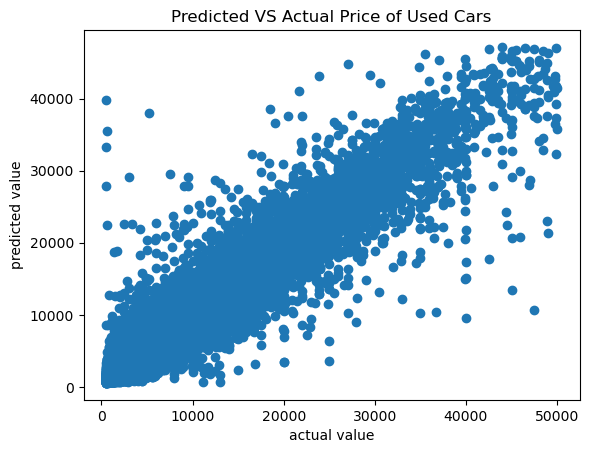

In [45]:
plt.scatter(y_test, y_pred)
plt.xlabel("actual value")
plt.ylabel("predicted value")
plt.title("Predicted VS Actual Price of Used Cars")